## Loading 1M rows of the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv',nrows=1000000)

## Explore and Analyse the DATA

In [3]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
#We don't need such big datatypes to represent our dataset efficiently
types1 = {'fare_amount': 'float32',
         'pickup_longitude': 'float32',
         'pickup_latitude': 'float32',
         'dropoff_longitude': 'float32',
         'dropoff_latitude': 'float32',
         'passenger_count': 'uint8'}

In [5]:
df = df.astype(types1)

In [6]:
df.dtypes

key                   object
fare_amount          float32
pickup_datetime       object
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count        uint8
dtype: object

In [7]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.841614,40.712276,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.979271,40.782005,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761269,-73.991241,40.750561,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987129,40.733143,-73.991570,40.758091,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768009,-73.956657,40.783764,1


#### Missing Value Treatment

In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.344579,-71.745049,39.555500,-71.744743,39.546509,1.684924
std,9.818618,12.104804,7.601978,11.410378,8.176702,1.323911
min,-44.900002,-3377.680908,-3116.285400,-3383.296631,-3114.338623,0.000000
25%,6.000000,-73.992058,40.734966,-73.991386,40.734047,1.000000
50%,8.500000,-73.981789,40.752693,-73.980133,40.753166,1.000000
75%,12.500000,-73.967094,40.767155,-73.963654,40.768127,2.000000
max,500.000000,2522.271240,2621.628418,45.581619,1651.553467,208.000000


In [9]:
#Check how many rows have null values
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [10]:
#Drop null since it is negligible in this case 
df.dropna(inplace=True)

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.344448,-71.745125,39.555538,-71.744743,39.546509,1.684941
std,9.818333,12.104649,7.601921,11.410378,8.176702,1.323907
min,-44.900002,-3377.680908,-3116.285400,-3383.296631,-3114.338623,0.000000
25%,6.000000,-73.992058,40.734966,-73.991386,40.734047,1.000000
50%,8.500000,-73.981789,40.752693,-73.980133,40.753166,1.000000
75%,12.500000,-73.967094,40.767155,-73.963654,40.768127,2.000000
max,500.000000,2522.271240,2621.628418,45.581619,1651.553467,208.000000


#### Outlier treatment

In [12]:
print(f"There are {len(df[df['fare_amount'] < 0])} negative fares.")
print(f"There are {len(df[df['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(df[df['fare_amount'] > 100])} fares greater than $100.")

There are 38 negative fares.
There are 29 $0 fares.
There are 396 fares greater than $100.


In [13]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Count')

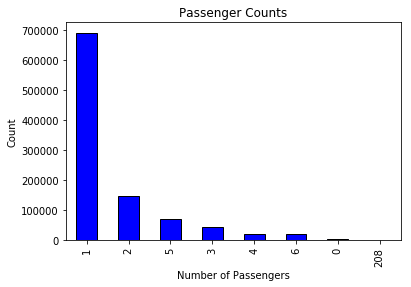

In [15]:
df['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k')
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count')

In [16]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [17]:
for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
    print(f'PERCENTILES OF {col.capitalize():17}: 2.5% = {round(np.percentile(df[col], 2.5), 2):5}\t\t97.5% = {round(np.percentile(df[col], 97.5), 2)}\n')


PERCENTILES OF Pickup_latitude  : 2.5% = 40.64		97.5% = 40.8

PERCENTILES OF Pickup_longitude : 2.5% = -74.01		97.5% = -73.78

PERCENTILES OF Dropoff_latitude : 2.5% = 40.64		97.5% = 40.81

PERCENTILES OF Dropoff_longitude: 2.5% = -74.01		97.5% = -73.78



In [18]:
df = df.loc[df['pickup_latitude'].between(40, 44)]
df = df.loc[df['pickup_longitude'].between(-75, -72)]
df = df.loc[df['dropoff_latitude'].between(40, 44)]
df = df.loc[df['dropoff_longitude'].between(-75, -72)]

In [19]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,954540.00000,954540.000000,954540.000000,954540.000000,954540.000000,954540.000000
mean,11.26715,-73.209351,40.379726,-73.206497,40.380077,1.597472
std,9.33145,0.766847,0.372622,0.768797,0.372839,1.153686
min,0.01000,-74.968140,40.052723,-74.964264,40.041180,1.000000
25%,6.00000,-73.992271,40.736568,-73.991570,40.735596,1.000000
50%,8.50000,-73.982086,40.753410,-73.980598,40.753876,1.000000
75%,12.50000,-73.968330,40.767567,-73.965340,40.768410,2.000000
max,99.75000,-72.702873,43.098709,-72.694839,43.415192,5.000000


## Feature Engineering

In [20]:
from math import sin, cos, sqrt, atan2, radians

In [21]:
#Get useable date for feature engineering
df['pickup_datetime'] = df['pickup_datetime'].str.replace(" UTC", "")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

#### From Timestamp we can get below new features

In [22]:
#Getting interger numbers from the pickup_datetime
df["hour"] = df.pickup_datetime.dt.hour
df["weekday"] = df.pickup_datetime.dt.weekday
df["month"] = df.pickup_datetime.dt.month
df["year"] = df.pickup_datetime.dt.year

#### Distance is aslo another crucial attribute

In [23]:
#Quicker but slightly less accurate
def dist_calc(df):
    R = 6373.0
    for i,row in df.iterrows():

        lat1 = radians(row['pickup_latitude'])
        lon1 = radians(row['pickup_longitude'])
        lat2 = radians(row['dropoff_latitude'])
        lon2 = radians(row['dropoff_longitude'])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        df.at[i,'distance'] = distance

In [24]:
dist_calc(df)

#### Another concept Hotspot proximity can serve as useful feature

In [25]:
#Function for distance calculation between coordinates as mapped variables
def sphere_dist(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

In [26]:
#Function for calculating distance between newly obtained distances from the hotspots.
def add_airport_dist(dataset):
    jfk_coord = (40.639722, -73.778889)
    ewr_coord = (40.6925, -74.168611)
    lga_coord = (40.77725, -73.872611)
    
    pickup_lat = dataset['pickup_latitude']
    dropoff_lat = dataset['dropoff_latitude']
    pickup_lon = dataset['pickup_longitude']
    dropoff_lon = dataset['dropoff_longitude']
    
    pickup_jfk = sphere_dist(pickup_lat, pickup_lon, jfk_coord[0], jfk_coord[1]) 
    dropoff_jfk = sphere_dist(jfk_coord[0], jfk_coord[1], dropoff_lat, dropoff_lon) 
    pickup_ewr = sphere_dist(pickup_lat, pickup_lon, ewr_coord[0], ewr_coord[1])
    dropoff_ewr = sphere_dist(ewr_coord[0], ewr_coord[1], dropoff_lat, dropoff_lon) 
    pickup_lga = sphere_dist(pickup_lat, pickup_lon, lga_coord[0], lga_coord[1]) 
    dropoff_lga = sphere_dist(lga_coord[0], lga_coord[1], dropoff_lat, dropoff_lon) 
    
    dataset['jfk_dist'] = pd.concat([pickup_jfk, dropoff_jfk], axis=1).min(axis=1)
    dataset['ewr_dist'] = pd.concat([pickup_ewr, dropoff_ewr], axis=1).min(axis=1)
    dataset['lga_dist'] = pd.concat([pickup_lga, dropoff_lga], axis=1).min(axis=1)
    
    return dataset

In [27]:
#Run the functions to add the features to the dataset
df = add_airport_dist(df)

In [28]:
df.dtypes

key                          object
fare_amount                 float32
pickup_datetime      datetime64[ns]
pickup_longitude            float32
pickup_latitude             float32
dropoff_longitude           float32
dropoff_latitude            float32
passenger_count               uint8
hour                          int64
weekday                       int64
month                         int64
year                          int64
distance                    float64
jfk_dist                    float64
ewr_dist                    float64
lga_dist                    float64
dtype: object

In [29]:
#We don't need such big datatypes to represent our dataset efficiently plus it is computationally costly
types2 = {'hour': 'uint8',
         'weekday': 'uint8',
         'month': 'uint8',
         'year': 'uint8',
         'distance': 'float32'}

In [30]:
df = df.astype(types2)
df.dtypes

key                          object
fare_amount                 float32
pickup_datetime      datetime64[ns]
pickup_longitude            float32
pickup_latitude             float32
dropoff_longitude           float32
dropoff_latitude            float32
passenger_count               uint8
hour                          uint8
weekday                       uint8
month                         uint8
year                          uint8
distance                    float32
jfk_dist                    float64
ewr_dist                    float64
lga_dist                    float64
dtype: object

In [31]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,weekday,month,year,distance,jfk_dist,ewr_dist,lga_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844315,40.721317,-73.841614,40.712276,1,17,0,6,217,1.031066,9.646954,27.522536,6.660412
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016045,40.711304,-73.979271,40.782005,1,16,1,1,218,8.452653,21.525217,13.030207,8.996038
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982735,40.761269,-73.991241,40.750561,2,0,3,8,219,1.390068,21.734953,16.282238,9.442261
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987129,40.733143,-73.991570,40.758091,1,4,5,4,220,2.800089,20.401018,15.949670,10.242046
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968094,40.768009,-73.956657,40.783764,1,7,1,3,218,1.999709,21.397717,18.867266,7.113775


## Attribute selection for regression

In [32]:
import seaborn as sns

#### Correlation between attributes

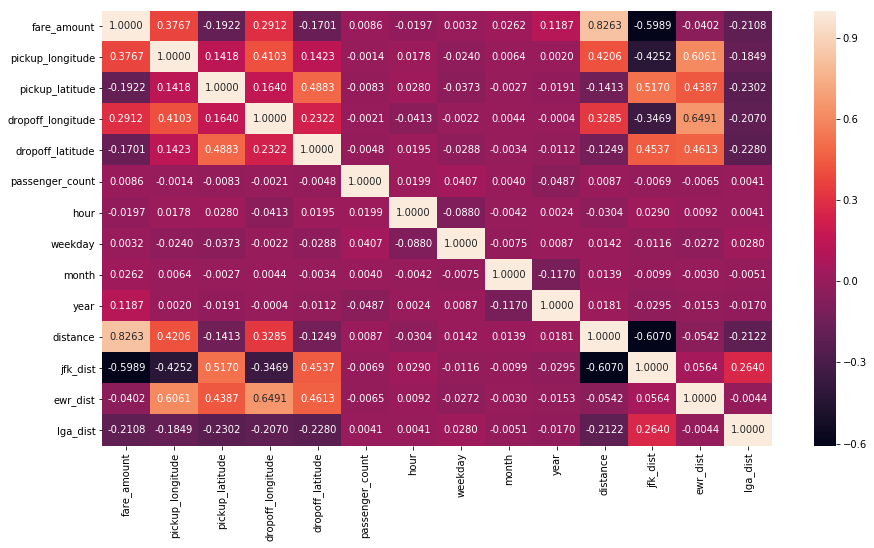

In [33]:
#Plot heatmap of value correlations
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['key','pickup_datetime'],axis=1).corr(),annot=True,fmt='.4f')

#### Scatter plot of 1K records

In [34]:
d = df[['fare_amount','distance','jfk_dist','lga_dist']]
d = d[:1000]

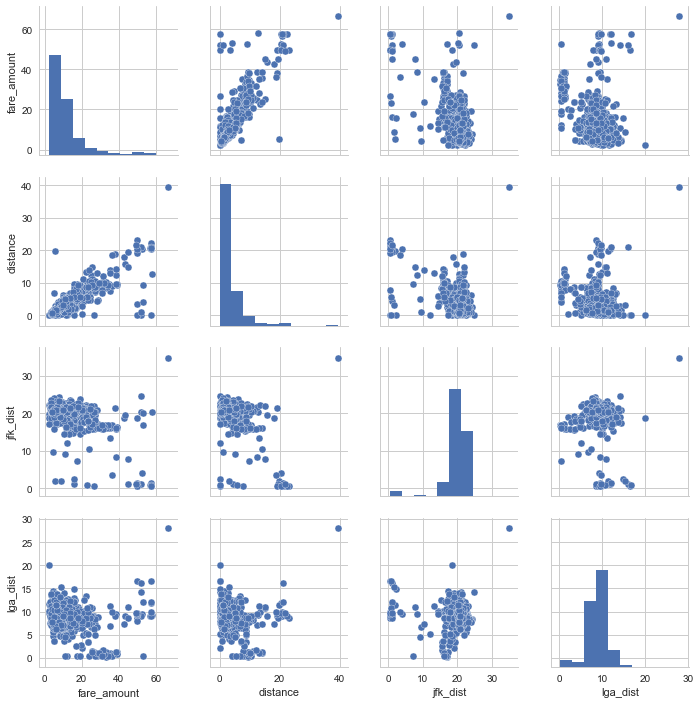

In [35]:
sns.set(style='whitegrid', context = 'notebook')
sns.pairplot(d,size=2.5)

In [36]:
X = df[['distance','jfk_dist']]
y = df[['fare_amount']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)

### Ordinary least squares

In [39]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_training.T, X_training)), X_training.T), y_training)
print(w_OLS)

[[2.21873311]
 [0.18256226]]


In [40]:
y_predict = np.matmul(X_testing, w_OLS).round(decimals = 2)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
print('Mean Squared Error using Ordinary Least Square for two variables: %.2f' % mean_squared_error(y_testing, y_predict))

Mean Squared Error using Ordinary Least Square for two variables: 30.22


In [43]:
y_predict1 = np.matmul(X_training, w_OLS).round(decimals = 2)

In [44]:
print('Mean Squared Error using Ordinary Least Square for two variables ( Training Error ): %.2f' % mean_squared_error(y_training, y_predict1))

Mean Squared Error using Ordinary Least Square for two variables ( Training Error ): 28.98


### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr_predict = lr.fit(X_training,y_training)

In [47]:
lin_predict = lr.predict(X_testing)
print('Mean Squared Error using Linear Regression for two variables: %.2f' % mean_squared_error(y_testing, lin_predict))

Mean Squared Error using Linear Regression for two variables: 27.04


In [48]:
lr_predict.score(X_testing,y_testing)

0.6895588023165142

## Now lets take it to other way around

In [49]:
y_data = df[['fare_amount']]
X_data = df.drop(['key','fare_amount','pickup_datetime'],axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [51]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
print(w_OLS)

[[-5.34216612e+00]
 [-1.49044768e+01]
 [-8.62237896e+00]
 [-1.31115682e+01]
 [ 5.46273272e-02]
 [ 9.18339983e-03]
 [-4.45569765e-02]
 [ 7.28169814e-02]
 [ 5.21789870e-01]
 [ 1.91611355e+00]
 [-2.37540192e-01]
 [ 2.82552338e-01]
 [-1.74431415e-01]]


In [52]:
y_pred = np.matmul(X_test, w_OLS).round(decimals = 2)

In [53]:
print('Mean Squared Error using Ordinary Least Square for all possible attributes: %.2f' % mean_squared_error(y_test, y_pred))

Mean Squared Error using Ordinary Least Square for all possible attributes: 25.80


In [54]:
lr_predictions = lr.fit(X_train,y_train)

In [55]:
linpred = lr.predict(X_test)
print('Mean Squared Error using Linear Regression for all possible attributes: %.2f' % mean_squared_error(y_test, linpred))

Mean Squared Error using Linear Regression for all possible attributes: 25.80


In [56]:
lr_predictions.score(X_test,y_test)

0.7037170542907676

### XGBoost

In [57]:
import xgboost as xgb

In [58]:
#Define a XGB model and parameters
def XGBoost(X_train,X_test,y_train,y_test):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_test,label=y_test)

    return xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                    ,dtrain=dtrain,num_boost_round=400, 
                    early_stopping_rounds=30,evals=[(dtest,'test')])

In [59]:
#Fit data and optimise the model, generate predictions
xgbm = XGBoost(X_train,X_test,y_train,y_test)

[21:17:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-mae:7.55523
Will train until test-mae hasn't improved in 30 rounds.
[21:17:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-mae:5.35024
[21:17:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	test-mae:3.84826
[21:17:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-mae:2.90214
[21:17:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-mae:2.37174
[21:17:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74:

In [60]:
XGBPredictions = xgbm.predict(xgb.DMatrix(X_test), ntree_limit = xgbm.best_ntree_limit)

In [61]:
print('Mean Squared Error using XGBoost for all possible attributes: %.2f' % mean_squared_error(y_test, XGBPredictions))

Mean Squared Error using XGBoost for all possible attributes: 11.41


# Apparently ensemble approache (i.e. XGBoost) improved the performance over baseline approaches (i.e.Ordinary least squares and Linear Regression) significantly.